# Introduction

Customer churn, or the rate at which customers stop doing business with a company, is a significant problem for businesses across various industries. Losing customers can have a substantial negative impact on a company's revenue, market share, and reputation. Therefore, predicting and preventing customer churn is a crucial business goal. In recent years, Artificial Neural Networks (ANN) have become a popular choice for building predictive models due to their ability to identify complex patterns and relationships in data.

The primary objective of this project is `to build an ANN model to predict customer churn and achieve high recall to decrease false negatives`. Recall, also known as sensitivity, is a critical metric for evaluating a predictive model's performance in identifying positive cases. High recall means that the model can correctly identify a large proportion of actual churn cases, reducing the number of customers who leave without being detected. In contrast, false negatives occur when the model fails to identify a positive case, leading to missed opportunities to retain customers.

By building an accurate ANN model, we can identify the customers most likely to churn and take appropriate actions to retain them. This project's outcome can provide valuable insights into customer behavior and assist businesses in developing effective strategies to reduce customer churn rates, enhance customer loyalty, and increase profitability.

# 1 - Import Libraries

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from keras import layers

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import classification_report
from keras.callbacks import EarlyStopping
from feature_engine.outliers import Winsorizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, concatenate
from tensorflow.keras import Model
from keras.regularizers import l2
from tensorflow.keras.models import load_model

import warnings 
warnings.filterwarnings('ignore')

import pickle

import time
start_time = time.time()

In [3]:
# Data loading

df = pd.read_csv('churn.csv')
pd.set_option('display.max_columns', None)

In [4]:
# Show first 10 rows in dataset

df.head(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.48000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.97000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.93000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.22000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.04000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.49000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.300000,13160.39,24.0,712.94000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,04:32:35,8,34.070000,9151.14,29.0,655.43000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.00000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,07:58:44,5,106.230000,28232.59,16.0,984.93392,No,Yes,No,Not Applicable,Too many ads,1


In [5]:
# Show last 10 rows of data

df.tail(10)

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37000,8a0fff47b7846031,25,F,Town,No Membership,2017-01-20,No,Gift Vouchers/Coupons,Smartphone,Wi-Fi,17:53:32,6,119.830000,13147.91,0.0,1019.382051,Yes,No,Yes,Solved in Follow-up,Poor Product Quality,1
37001,8832eec42dc0e347,38,M,Town,Silver Membership,2016-09-19,NaN,Credit/Debit Card Offers,Smartphone,Wi-Fi,17:42:11,19,34.790000,30820.83,23.0,631.830000,Yes,No,Yes,Unsolved,Poor Customer Service,1
37002,b9d9761f4d367c7a,49,F,City,No Membership,2017-12-12,NaN,Without Offers,Both,Wi-Fi,02:31:18,13,499.510000,17110.71,24.0,587.010000,Yes,No,No,Not Applicable,Poor Customer Service,1
37003,a38816e7522f5f7b,42,F,Town,Basic Membership,2017-07-05,Yes,Gift Vouchers/Coupons,Both,Wi-Fi,21:42:42,3,529.580000,42964.11,18.0,619.280000,Yes,Yes,No,Not Applicable,Poor Product Quality,1
37004,8968d0458164dda9,19,F,Town,Gold Membership,2016-07-17,Yes,Without Offers,Smartphone,Fiber_Optic,22:03:48,21,119.960000,14218.43,7.0,781.840000,Yes,No,No,Not Applicable,Too many ads,0
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,09:32:50,15,199.330000,29455.29,9.0,846.520000,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,02:28:52,15,368.500000,27038.47,8.0,835.980000,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,17:50:38,13,272.130000,39305.35,27.0,714.900000,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,17:07:57,-999,65.070000,46108.73,6.0,744.990000,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,03:50:49,3,972.776679,26905.49,22.0,700.930000,Yes,No,Yes,No Information Available,Poor Customer Service,1


| Column | Description |
| --- | --- |
| `user_id` | ID of a customer |
| `age` | Age of a customer |
| `gender` | Gender of a customer |
| `region_category` | Region that a customer belongs to |
| `membership_category` | Category of the membership that a customer is using |
| `joining_date` | Date when a customer became a member |
| `joined_through referral` | Whether a customer joined using any referral code or ID |
| `preferred_offer types` | Type of offer that a customer prefers |
| `medium_of operation` | Medium of operation that a customer uses for transactions |
| `internet_option` | Type of internet service a customer uses |
| `last_visit_time` | The last time a customer visited the website |
| `days_since_last_login` | Number of days since a customer last logged into the website |
| `avg_time_spent` | Average time spent by a customer on the website |
| `avg_transaction_value` | Average transaction value of a customer |
| `avg_frequency_login_days` | Number of times a customer has logged in to the website |
| `points_in_wallet` | Points awarded to a customer on each transaction |
| `used_special_discount` | Whether a customer uses special discounts offered |
| `offer_application_preference` | Whether a customer prefers offers |
| `past_complaint` | Whether a customer has raised any complaints |
| `complaint_status` | Whether the complaints raised by a customer was resolved |
| `feedback` | Feedback provided by a customer |
| `churn_risk_score` | Churn score <br><br> `0` : Not churn <br> `1` : Churn |

# 2 - EDA

In [6]:
# Check duplicated data
df[df.duplicated()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
3321,9f97903015fd0580,29,M,NaN,Silver Membership,2017-10-31,NaN,Credit/Debit Card Offers,Desktop,Fiber_Optic,12:47:12,16,67.850000,1228.39,16.0,712.300000,Yes,No,No,Not Applicable,No reason specified,0
9505,b0045613327d17fb,36,F,City,Platinum Membership,2016-03-07,No,Credit/Debit Card Offers,Desktop,Wi-Fi,18:16:03,8,210.640000,46466.03,9.0,716.450000,No,Yes,No,Not Applicable,Too many ads,0
11478,9ba8bf4d1e50100c,47,F,Town,Gold Membership,2016-07-10,No,Credit/Debit Card Offers,Both,Fiber_Optic,02:13:06,-999,497.320000,15082.13,11.0,730.340000,No,Yes,Yes,Unsolved,No reason specified,0
12589,8f39faa74b6607e7,26,F,City,Premium Membership,2015-10-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,17:33:22,-999,116.140000,26377.39,0.0,710.310000,Yes,No,Yes,Solved,No reason specified,0
14840,859745861c61ebef,35,M,City,Silver Membership,2016-03-27,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,03:44:26,23,1064.763315,42483.66,28.0,702.110000,No,Yes,Yes,Solved in Follow-up,Too many ads,1
16165,9c8c2db425854d5e,54,M,NaN,Platinum Membership,2015-09-28,Yes,Without Offers,Smartphone,Fiber_Optic,05:39:46,12,1267.660000,38244.30,18.0,741.640000,No,Yes,No,Not Applicable,No reason specified,0
22341,9186d6f284e4ac5b,59,M,Town,Basic Membership,2015-01-07,NaN,Credit/Debit Card Offers,Desktop,Mobile_Data,14:43:07,16,266.190000,48632.63,19.0,654.590000,Yes,Yes,Yes,Unsolved,Poor Website,1
24693,930b39d136f072e3,56,M,Town,Premium Membership,2015-09-18,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,17:05:33,18,150.620000,23164.44,16.0,775.190000,Yes,No,Yes,Solved,Poor Product Quality,0
26214,a594feaffc78b36b,58,M,City,Basic Membership,2017-04-01,Yes,Credit/Debit Card Offers,Desktop,Wi-Fi,05:23:02,19,0.000000,7614.88,29.0,202.317926,Yes,No,No,Not Applicable,Poor Customer Service,1
26687,9d20f093164c98a3,35,M,NaN,Platinum Membership,2016-06-08,No,Gift Vouchers/Coupons,Both,Fiber_Optic,17:58:45,4,228.570000,77844.85,14.0,714.280000,No,Yes,No,Not Applicable,User Friendly Website,0


In [7]:
df.duplicated().sum()

18

There are `18 rows` of duplicated data 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [9]:
df.shape

(37010, 22)

We have `37,010 rows` and `22 column`, but since this is included `duplicated and NaN data` it's not the final number.

In [10]:
# Data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,37010.0,37.120697,15.866834,10.00,23.0000,37.000,51.0000,64.000000
days_since_last_login,37010.0,-41.943502,228.875324,-999.00,8.0000,12.000,16.0000,26.000000
avg_time_spent,37010.0,279.201356,330.017336,0.00,60.1225,161.770,356.5250,3235.578521
avg_transaction_value,37010.0,29272.430216,19445.963492,800.46,14177.8350,27554.485,40858.6725,99914.050000
avg_frequency_login_days,37010.0,14.659540,9.478756,0.00,7.0000,14.000,22.0000,73.061995
points_in_wallet,37010.0,623.590885,270.218956,0.00,574.2200,680.400,756.9900,2069.069761
churn_risk_score,37010.0,0.540881,0.498333,0.00,0.0000,1.000,1.0000,1.000000


- The average of customer is `37 years old` with `10 years old` as the youngest and `64 years old` as the old. We can see how wide the customer of our platform is. So a good UI/UX as well as the family friendly ads should be always our top priority

- There is a outliers/data that's not normal. We can see the minimum days since last login is `-999`. Since the metrix is `day(s)`, it's `impossible` to have value `< 0`

- In average, our customer spend approximately `279 minutes` or `4.65 hours` in our platform

## Target Proportion

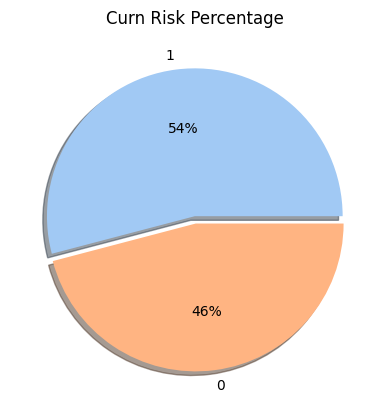

In [11]:
# Check balance on churn data
plt.pie(data=df ,x=df.churn_risk_score.value_counts(),labels=df.churn_risk_score.unique(), autopct='%.0f%%', explode = [0, 0.05], shadow=True, colors=sns.color_palette('pastel'))
plt.title('Curn Risk Percentage')
plt.show()

## Churn Trend in Year and Month 

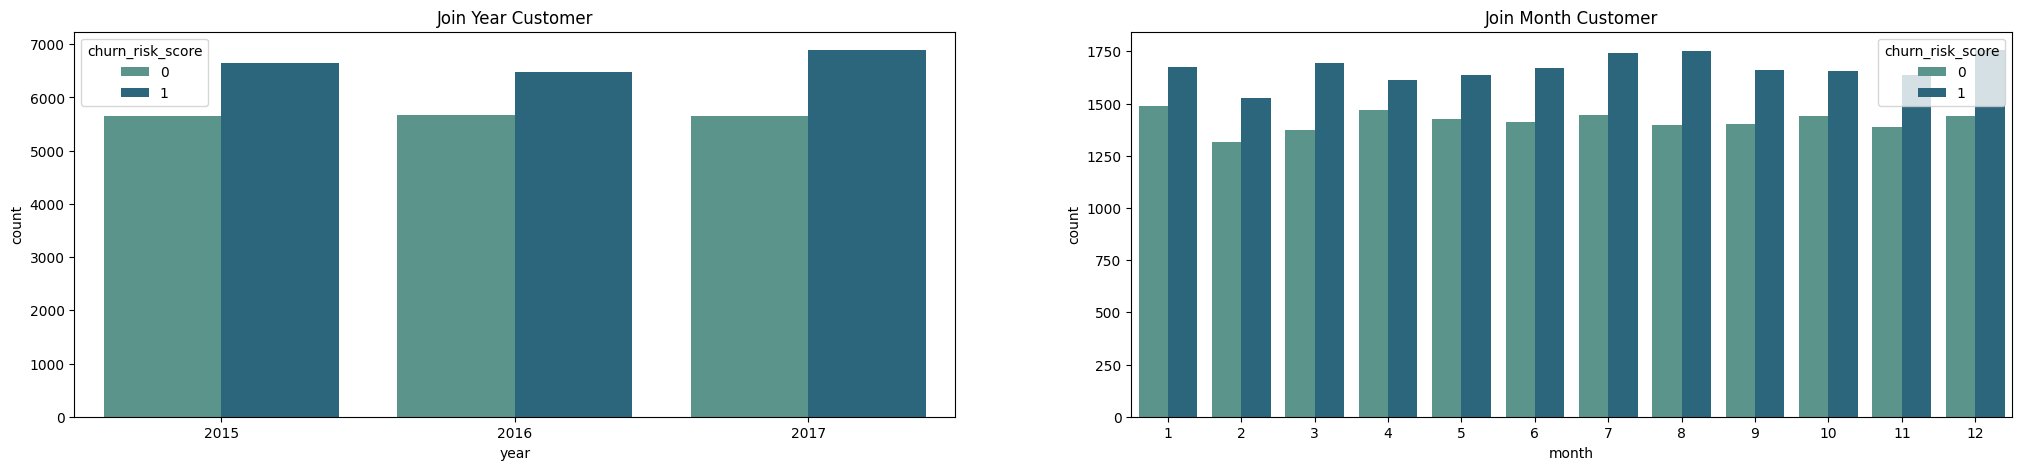

In [12]:
# Check if year/month joined determine to the churn risk 
# create new column
df['year'] = pd.DatetimeIndex(df['joining_date']).year
df['month'] = pd.DatetimeIndex(df['joining_date']).month
df['day'] = pd.DatetimeIndex(df['joining_date']).day

# plotting
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(25,5))

sns.countplot(df, x='year', hue='churn_risk_score', fill=True,ax=ax1, palette="crest")
sns.countplot(df, x='month', hue='churn_risk_score', fill=True,ax=ax2, palette="crest")
ax1.set_title('Join Year Customer')
ax2.set_title('Join Month Customer')
plt.show()

As we can see here, year doesn't really determine if a customer will churn nor the month. But, as we can see from the data above and the pie chart that the proportion of churn customer is slightly bigger `0.4%`

## Reason Why Customer Churn

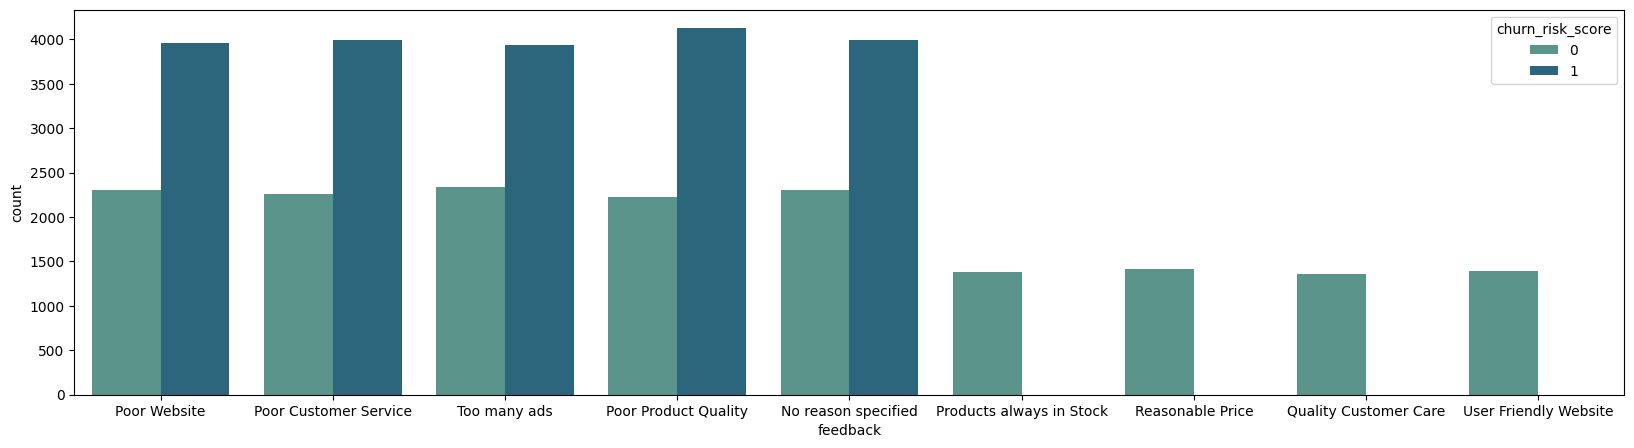

In [13]:
# Check distribution of churn/not based on feedbacks
plt.figure(figsize=(20, 5))
sns.countplot(df, x='feedback', hue='churn_risk_score', palette="crest")
plt.show()

If the feedback is positive, guaranteed that the customer will not churn. As we can see from the data above, from the positive feedbacks shown there is `NO ONE` churn customer recorded. Meanwhile if the feedback is `neutral or negative` there is possibility of customer to churn. We can see here even to the most neutral feedback among other such as `No reason specified` showing the tendency of customer to not satisfy with our platfor, hence they might churn.

## Average Transaction Value and Average Time Spent

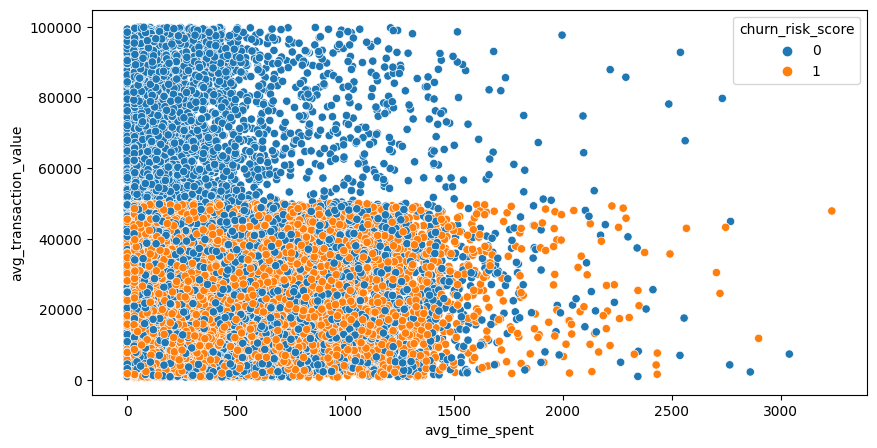

In [14]:
# Check if average transaction or average time spent determine churn
plt.figure(figsize=(10,5))
sns.scatterplot(df, x='avg_time_spent', y='avg_transaction_value', hue='churn_risk_score')
plt.show()

If a customer has average transaction value approximately above `50,000`, it's guaranteed that the customer will not churn.

## Points in Wallet

Average points in wallet for Churn customer = 573.7290763193597
Average points in wallet for NOT Churn customer = 682.3322740866561


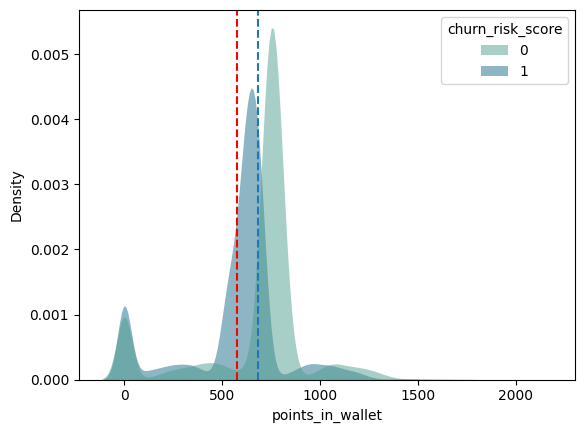

In [15]:
# Check if average point determine to customer churn
sns.kdeplot(
   df, x="points_in_wallet", hue="churn_risk_score",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.axvline(df[df['churn_risk_score']==1]['points_in_wallet'].mean(), ls='dashed', color='red')
plt.axvline(df[df['churn_risk_score']==0]['points_in_wallet'].mean(), ls='dashed')


print('Average points in wallet for Churn customer =', df[df['churn_risk_score']==1]['points_in_wallet'].mean())
print('Average points in wallet for NOT Churn customer =', df[df['churn_risk_score']==0]['points_in_wallet'].mean())
plt.show()

the average points in wallet for churn customer is 573 points

# 3 - Preprocessing

## 3.1 Duplicated Data

I will delete all duplicated data and keep the last data

In [16]:
df = df.drop_duplicates(keep='last')

# Check if there is still duplicated data

df[df.duplicated()]

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,year,month,day


All duplicated data is well handled

## 3.2 Handling last_visit

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36992 entries, 0 to 37009
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       36992 non-null  object 
 1   age                           36992 non-null  int64  
 2   gender                        36933 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       31554 non-null  object 
 7   preferred_offer_types         36704 non-null  object 
 8   medium_of_operation           31599 non-null  object 
 9   internet_option               36992 non-null  object 
 10  last_visit_time               36992 non-null  object 
 11  days_since_last_login         36992 non-null  int64  
 12  avg_time_spent                36992 non-null  float64
 13  a

`last_visit_time` is recorded as object meanwhile it recorded last time visit session's customer in our platform. So I will split it into `last_visit_time_hh` indicating the hour and `last_visit_time_mm` indicating the minutes

In [18]:
# split into separate columns
df[['last_visit_time_hh', 'last_visit_time_mm']] = df['last_visit_time'].str.split(':', expand=True)[[0, 1]]

# 4 - Feature Engineering

## 4.1 - Splitting X and y

In [80]:
# Splitting data 
X = df.drop('churn_risk_score', axis=1)
y = df['churn_risk_score']

In [81]:
# Split Train-set, Validation-set, and Test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=29)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=29)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (23674, 26)
Val Size :  (5919, 26)
Test Size :  (7399, 26)


## 4.2 - Handling Missing values

In [21]:
# Check missing values in X_train
missing_xtrain = pd.DataFrame(X_train.isnull().sum(), columns=['No. of missing values'])
missing_xtrain['% missing_values'] = (missing_xtrain/len(X_train)).round(2)*100
missing_xtrain
     

,No. of missing values,% missing_values
user_id,0,0.0
age,0,0.0
gender,43,0.0
region_category,3513,15.0
membership_category,0,0.0
joining_date,0,0.0
joined_through_referral,3426,14.0
preferred_offer_types,186,1.0
medium_of_operation,3437,15.0
internet_option,0,0.0


In [22]:
# Check missing values in X_val
missing_xval = pd.DataFrame(X_val.isnull().sum(), columns=['No. of missing values'])
missing_xval['% missing_values'] = (missing_xval/len(X_val)).round(2)*100
missing_xval

,No. of missing values,% missing_values
user_id,0,0.0
age,0,0.0
gender,6,0.0
region_category,873,15.0
membership_category,0,0.0
joining_date,0,0.0
joined_through_referral,886,15.0
preferred_offer_types,43,1.0
medium_of_operation,852,14.0
internet_option,0,0.0


In [23]:
# Check missing values in X_test
missing_xtest = pd.DataFrame(X_test.isnull().sum(), columns=['No. of missing values'])
missing_xtest['% missing_values'] = (missing_xtest/len(X_test)).round(2)*100
missing_xtest

,No. of missing values,% missing_values
user_id,0,0.0
age,0,0.0
gender,10,0.0
region_category,1042,14.0
membership_category,0,0.0
joining_date,0,0.0
joined_through_referral,1126,15.0
preferred_offer_types,59,1.0
medium_of_operation,1104,15.0
internet_option,0,0.0


There are two common ways to handle missing values
1. Imputation of mean/median of the column
2. Drop NaN rows

Since the NaN values are in the categorical column which it's is unlikely to get the mean/median of the column, hence we will drop the NaN rows.

In [82]:
for i in [X_train, X_val, X_test]:
  i.dropna(inplace=True)

In [83]:
# Drop rows in y-set
indices = X_train.index
y_train = y_train.loc[indices]

indices = X_val.index
y_val = y_val.loc[indices]

indices = X_test.index
y_test = y_test.loc[indices]

## 4.3 - Handling Outliers

In [26]:
# Define Numerical and Categorical Columns
num_cols = X._get_numeric_data().columns.tolist()
cat_cols = [i for i in X if i not in num_cols]

In [27]:
num_cols

['age',
 'days_since_last_login',
 'avg_time_spent',
 'avg_transaction_value',
 'avg_frequency_login_days',
 'points_in_wallet',
 'year',
 'month',
 'day']

### 4.3 - Handling Outliers

In [28]:
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')
    plt.axvline(X_train[i].mean(), color='red', linestyle='dashed', label = 'Mean')
    plt.legend()

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

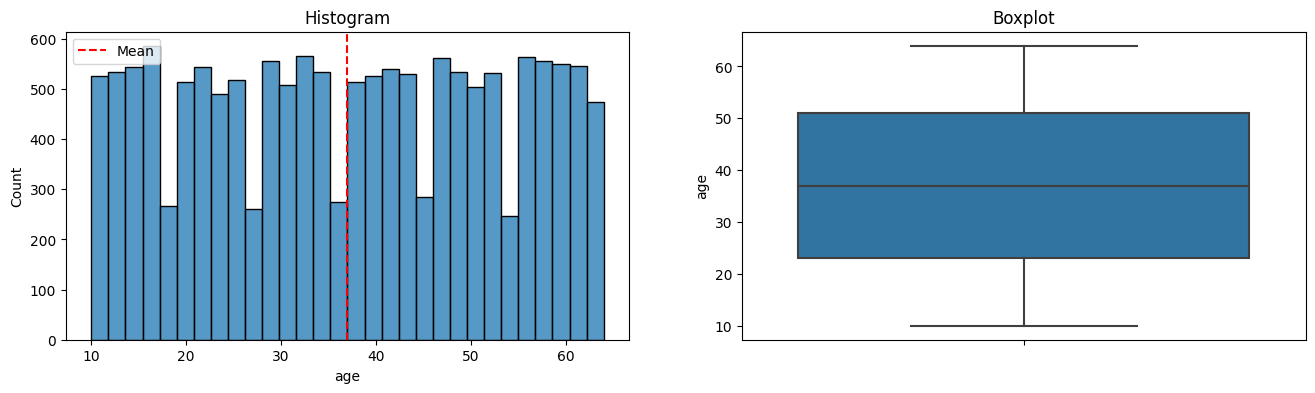

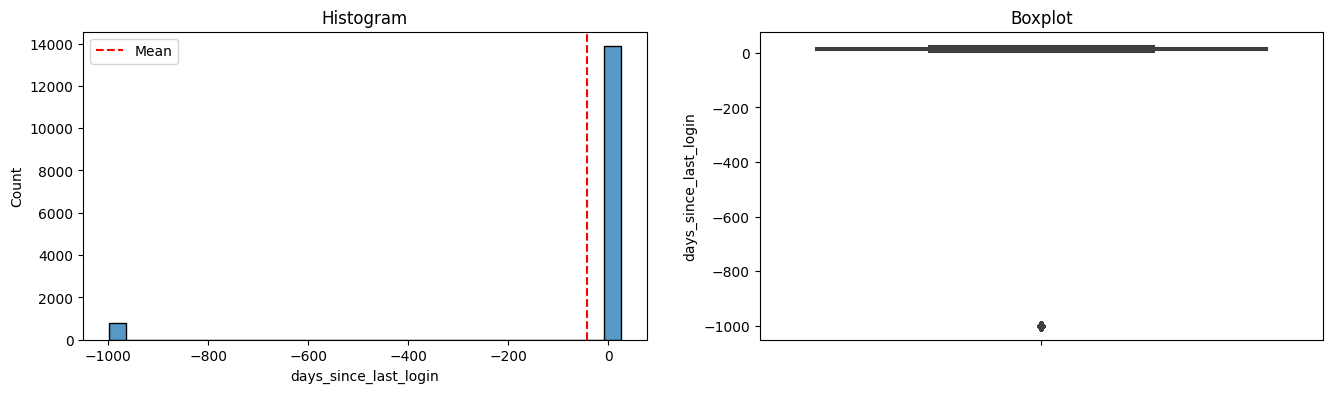

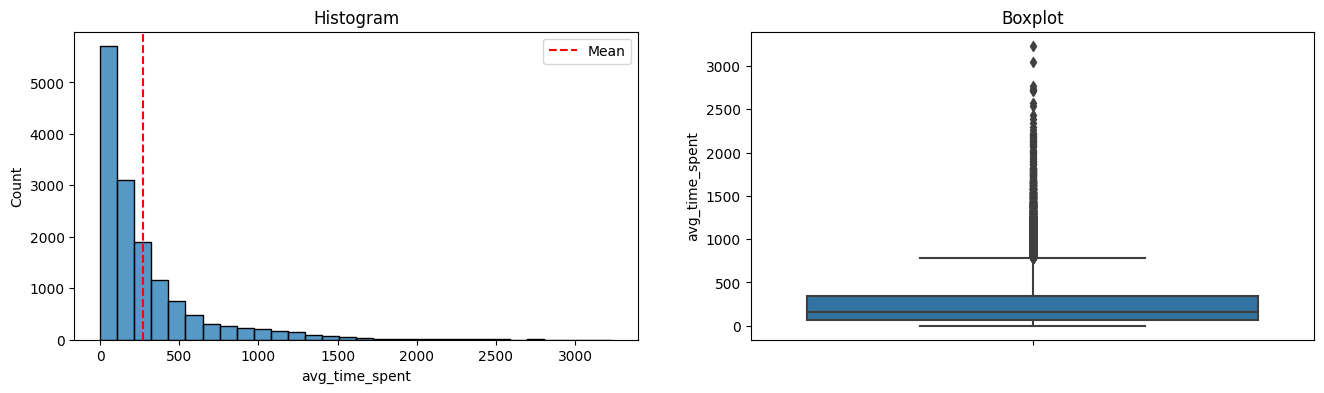

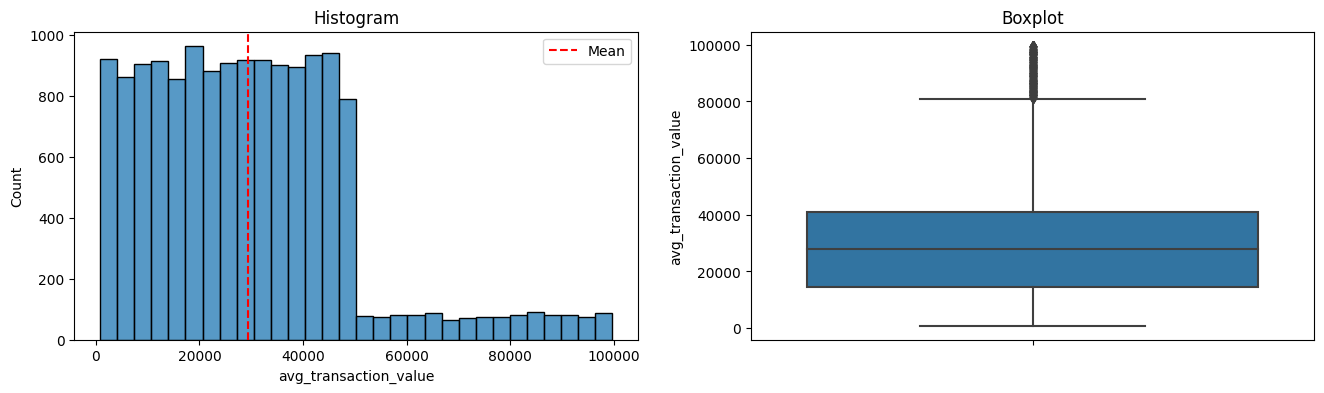

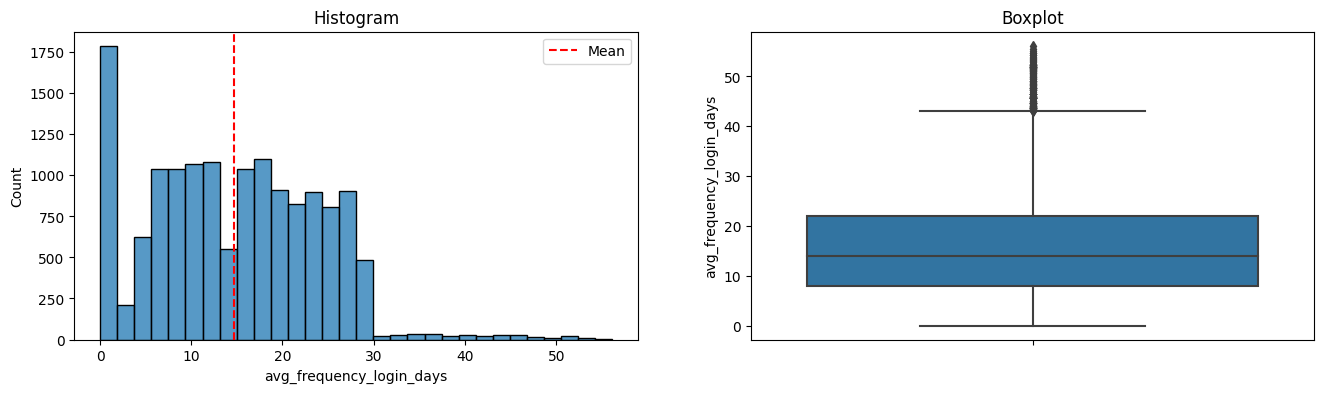

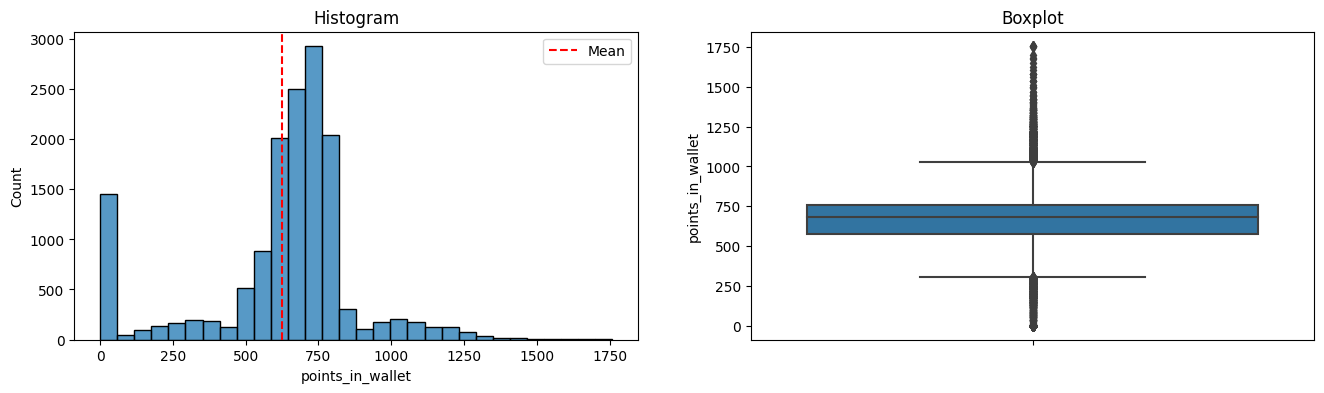

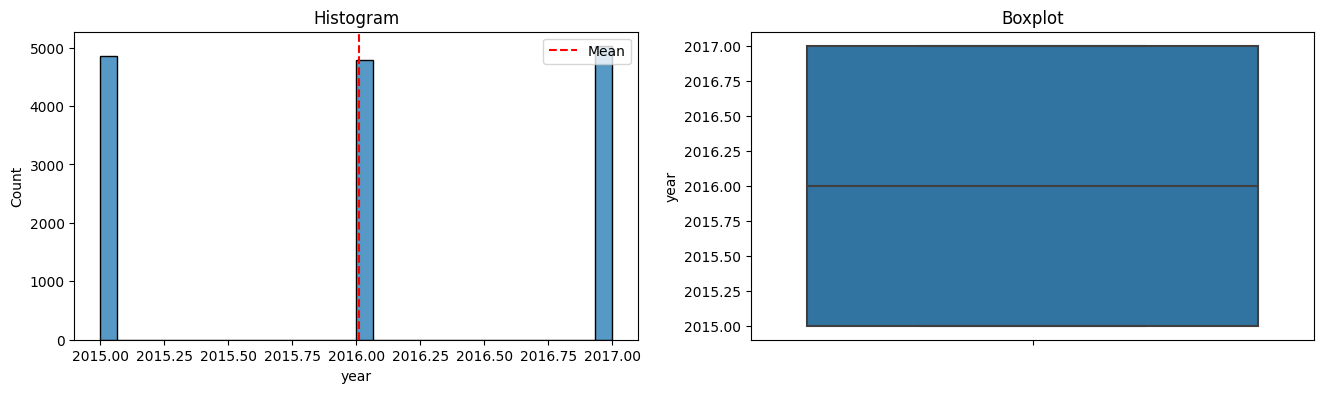

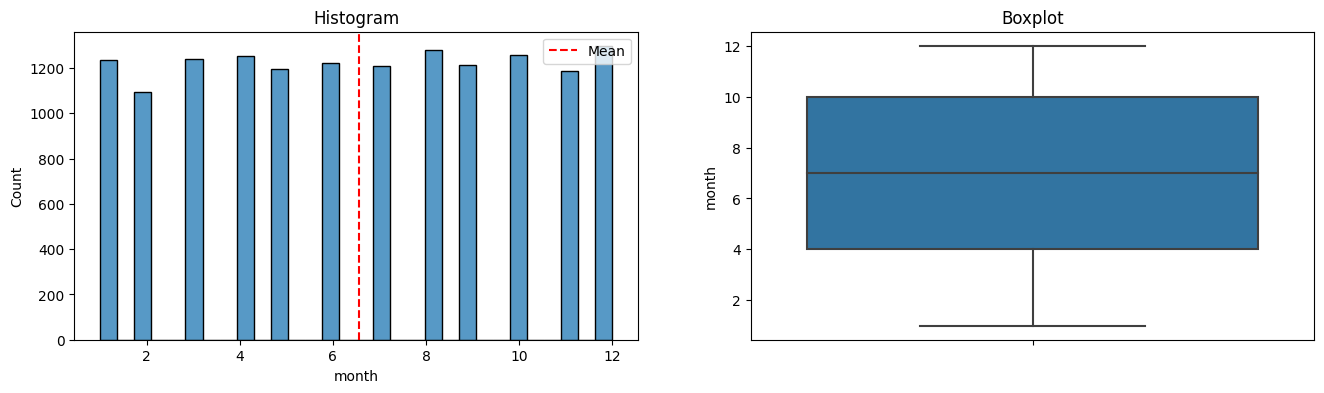

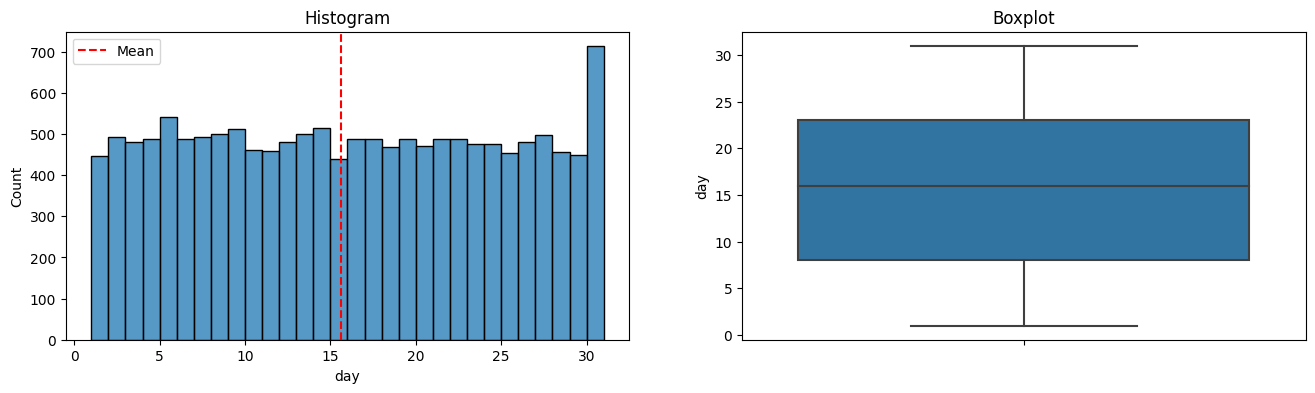

In [29]:
for i in num_cols:
    diagnostic_plots(X_train, i)

## 4.4 - Feature Selection: Pearson

<Axes: >

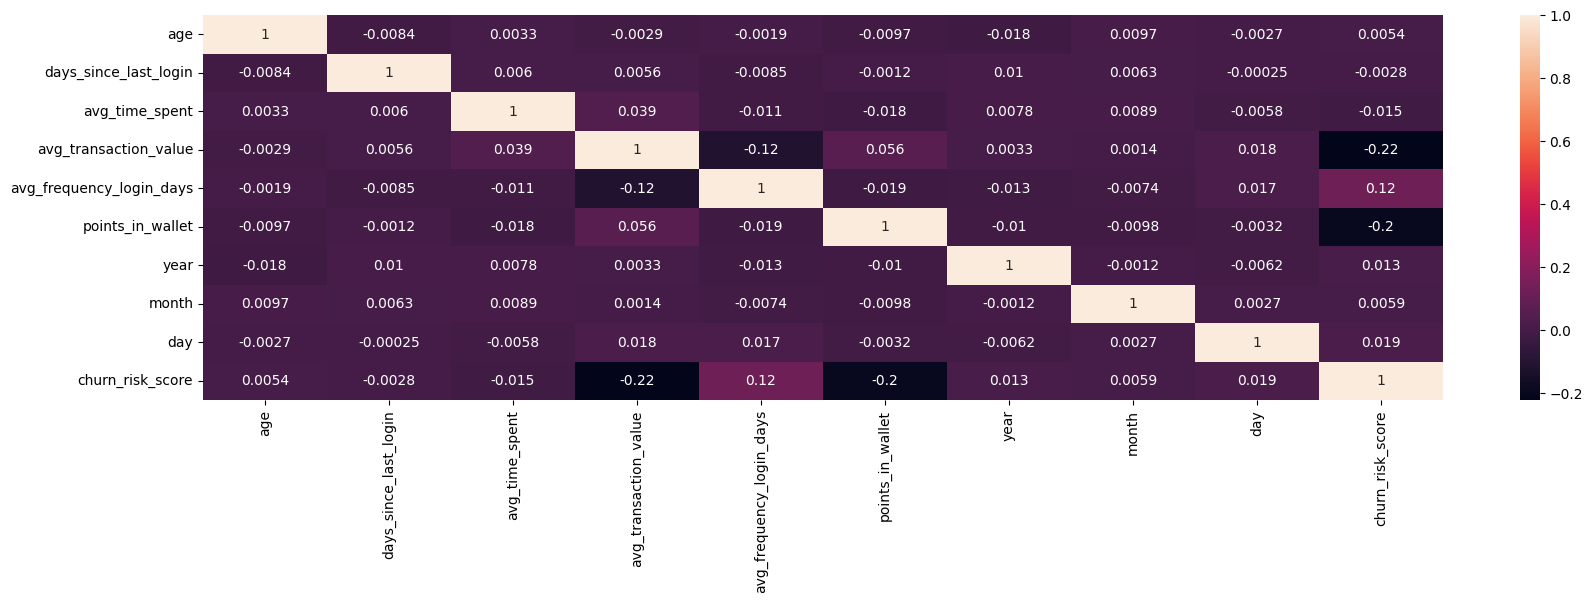

In [30]:
# plot pearson
pearson = pd.concat([X_train[num_cols], y_train],axis=1)
corr = pearson.corr()
plt.figure(figsize=(20,5))
sns.heatmap(corr, annot=True)

In [31]:
threshold = 0.05
a = abs(corr['churn_risk_score'])
result= a[a>threshold]
result
pea_list = result.index.to_list()


<Axes: >

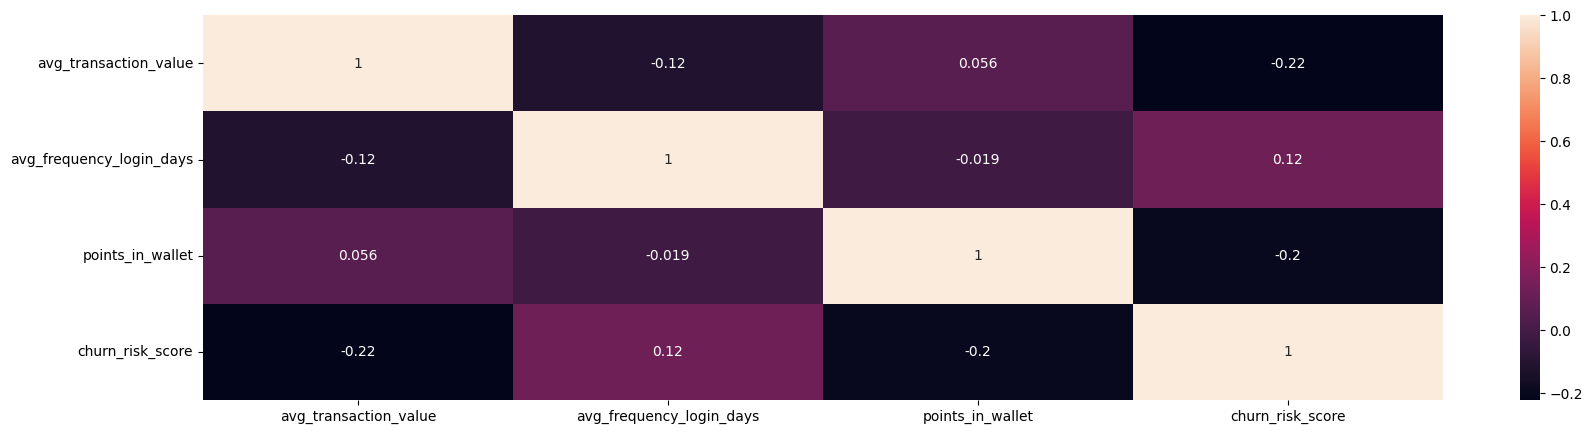

In [32]:
corr = pearson[pea_list].corr()
plt.figure(figsize=(20,5))
sns.heatmap(corr, annot=True)

Here I will drop `user_id` because it has nothing to do with the factor determining customer churn.`avg_transaction_value` and `points_in_wallet` due to its highest dependency. Lastly, we will also delete last_visit_time because we already have `last_visit_time_hh` and `last_visit_time_mm`.

In [84]:
for i in [X_train, X_val, X_test]:
  i.drop(['user_id','avg_transaction_value', 'points_in_wallet','last_visit_time', 'joining_date'], axis=1, inplace=True)

In [34]:
# Redefine numerical and categorical columns
num_cols =[i for i in X_train if i not in cat_cols]
cat_cols = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback', 'year', 'month', 'day']
outliers = ['days_since_last_login', 'avg_time_spent', 'avg_frequency_login_days']


## 4.5 Pipeline

In [35]:
# Create a pipeline
outlier_pipeline = make_pipeline(Winsorizer(capping_method= 'iqr', tail='both', fold=1.5))

num_pipeline = make_pipeline(MinMaxScaler())

cat_pipeline = make_pipeline(OneHotEncoder(sparse=False,handle_unknown = 'ignore'))

pipeline = ColumnTransformer([
    ('pipe_outlier', outlier_pipeline, outliers),
    ('pipe_num', num_pipeline, num_cols),
    ('pipe_cat', cat_pipeline, cat_cols)
])


In [36]:
# Fit and Transform

X_train = pipeline.fit_transform(X_train)
X_val = pipeline.transform(X_val)
X_test = pipeline.transform(X_test)

## 4.6 Pipeline TF

In [37]:

# input data pipeline
train_pipe = tf.data.Dataset.from_tensor_slices((X_train,y_train)).shuffle(5).batch(150)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test,y_test)).shuffle(5).batch(150)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val,y_val)).shuffle(5).batch(150)

# 5 - Sequential API

## 5.1 - Model Definition

In [38]:
# Clear Session
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [39]:
X_train.shape

(14671, 98)

In [40]:
# Create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(32, activation='relu', input_shape=(98,)))
model_sequential.add(Dense(16, activation='relu'))
model_sequential.add(Dense(1, activation='sigmoid'))

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['Recall'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3168      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,713
Trainable params: 3,713
Non-trainable params: 0
_________________________________________________________________


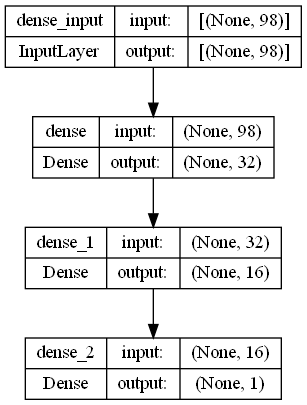

In [41]:
# Plot Layer
tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## 5.2 Model training

In [42]:
# Train the model
history_seq = model_sequential.fit(train_pipe,
                                   epochs=25,
                                   validation_data=(val_pipe),
                                   batch_size=32)

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Epoch 1/25
98/98 [==============================] - 1s 6ms/step - loss: 0.7219 - recall: 0.6986 - val_loss: 0.6137 - val_recall: 0.6875
Epoch 2/25
98/98 [==============================] - 0s 3ms/step - loss: 0.5670 - recall: 0.8620 - val_loss: 0.5267 - val_recall: 0.8020
Epoch 3/25
98/98 [==============================] - 0s 3ms/step - loss: 0.4744 - recall: 0.8567 - val_loss: 0.4300 - val_recall: 0.9202
Epoch 4/25
98/98 [==============================] - 0s 3ms/step - loss: 0.3840 - recall: 0.8303 - val_loss: 0.3601 - val_recall: 0.9207
Epoch 5/25
98/98 [==============================] - 0s 3ms/step - loss: 0.3273 - recall: 0.8213 - val_loss: 0.3227 - val_recall: 0.9315
Epoch 6/25
98/98 [==============================] - 0s 4ms/step - loss: 0.2994 - recall: 0.8246 - val_loss: 0.2875 - val_recall: 0.8706
Epoch 7/25
98/98 [==============================] - 0s 3ms/step - loss: 0.2820 - recall: 0.8292 - val_loss: 0.2869 - val_recall: 0.9391
Epoch 8/25
98/98 [==============================

## 5.3 Model Evaluation

In [43]:
# Create dataframe
history_seq_df = pd.DataFrame(history_seq.history)

<Axes: >

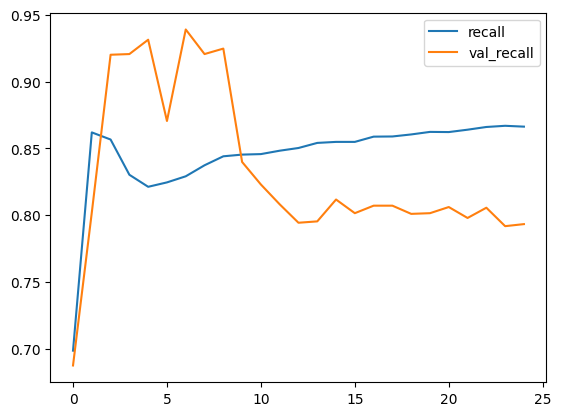

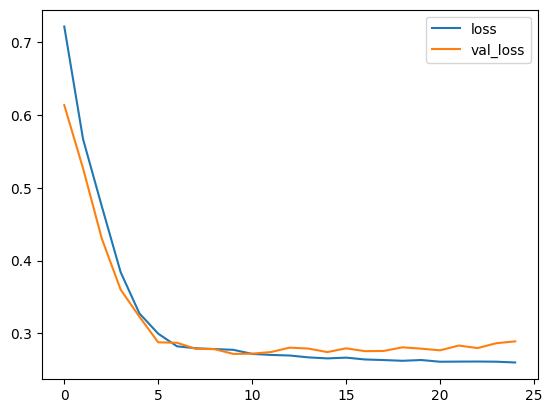

In [44]:
# plot_training_result
history_seq_df[['recall', 'val_recall']].plot()
history_seq_df[['loss', 'val_loss']].plot()

In [45]:
# Model Evaluation of test-set

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

142/142 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2126
           1       0.91      0.80      0.85      2412

    accuracy                           0.85      4538
   macro avg       0.85      0.85      0.85      4538
weighted avg       0.86      0.85      0.85      4538



# 6 - Functional API

## 6.1 Model Definition

In [46]:
# Clear Session
seed =20
tf.keras.backend.clear_session
np.random.seed(seed)
tf.random.set_seed(seed)

In [47]:
# Create session
input_layer = Input(shape=(98,))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(18, activation='relu')(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1, activation='sigmoid')(concat_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

In [48]:
# Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='Recall')

model_functional.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 98)]         0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 32)           3168        ['input_1[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 18)           594         ['dense_3[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 116)          0           ['input_1[0][0]',                
                                                                  'dense_4[0][0]']            

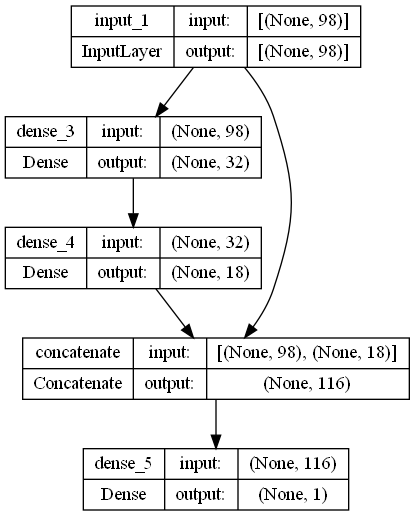

In [49]:
# Plot layers
tf.keras.utils.plot_model(model_functional, show_shapes=True)

## 6.2 Model Training

In [50]:
# Train the model
history_func = model_functional.fit(train_pipe,
                                    epochs=25,
                                    validation_data=(val_pipe),
                                    batch_size=32)

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Epoch 1/25
98/98 [==============================] - 1s 5ms/step - loss: 3.8636 - recall: 0.6871 - val_loss: 0.6741 - val_recall: 0.4997
Epoch 2/25
98/98 [==============================] - 0s 4ms/step - loss: 0.6228 - recall: 0.6415 - val_loss: 0.5836 - val_recall: 0.5673
Epoch 3/25
98/98 [==============================] - 0s 3ms/step - loss: 0.5249 - recall: 0.7916 - val_loss: 0.4893 - val_recall: 0.7898
Epoch 4/25
98/98 [==============================] - 0s 4ms/step - loss: 0.4552 - recall: 0.8280 - val_loss: 0.4257 - val_recall: 0.7985
Epoch 5/25
98/98 [==============================] - 0s 3ms/step - loss: 0.4010 - recall: 0.8233 - val_loss: 0.3858 - val_recall: 0.7703
Epoch 6/25
98/98 [==============================] - 0s 4ms/step - loss: 0.3564 - recall: 0.8217 - val_loss: 0.3518 - val_recall: 0.7632
Epoch 7/25
98/98 [==============================] - 0s 4ms/step - loss: 0.3259 - recall: 0.8143 - val_loss: 0.3315 - val_recall: 0.7586
Epoch 8/25
98/98 [==============================

## 6.3 Model Evaluation

In [51]:
# Create Dataframe
history_func_df = pd.DataFrame(history_func.history)

<Axes: >

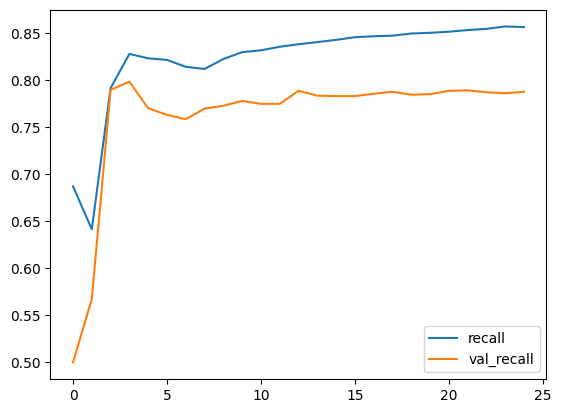

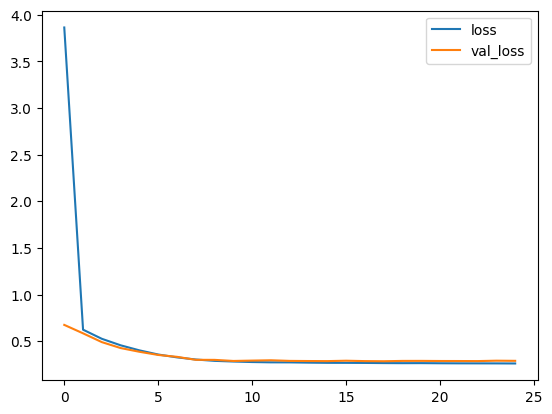

In [52]:
# Plot Training Model
history_func_df[['recall', 'val_recall']].plot()
history_func_df[['loss', 'val_loss']].plot()

In [53]:
# Evaluate Test Set
y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5,1,0)


print(classification_report(y_test, y_pred_func))

142/142 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      2126
           1       0.92      0.79      0.85      2412

    accuracy                           0.85      4538
   macro avg       0.86      0.86      0.85      4538
weighted avg       0.86      0.85      0.85      4538



# 7 - Sequential Improvement

## 7.1 - Improvement Definition

In [54]:
# clear session
seed = 39
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [55]:
sequential_improvement = Sequential()
sequential_improvement.add(Dense(32, activation='LeakyReLU', input_shape=(98,)))
sequential_improvement.add(tf.keras.layers.BatchNormalization())

sequential_improvement.add(Dense(16, activation='LeakyReLU'))
sequential_improvement.add(tf.keras.layers.BatchNormalization())

sequential_improvement.add(Dense(8, activation='LeakyReLU'))
sequential_improvement.add(tf.keras.layers.BatchNormalization())

sequential_improvement.add(Dense(4, activation='LeakyReLU'))
sequential_improvement.add(tf.keras.layers.BatchNormalization())

sequential_improvement.add(Dense(1, activation='sigmoid'))

# Compile
sequential_improvement.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['Recall'])

sequential_improvement.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3168      
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_1 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_2 (Batc  (None, 8)                3

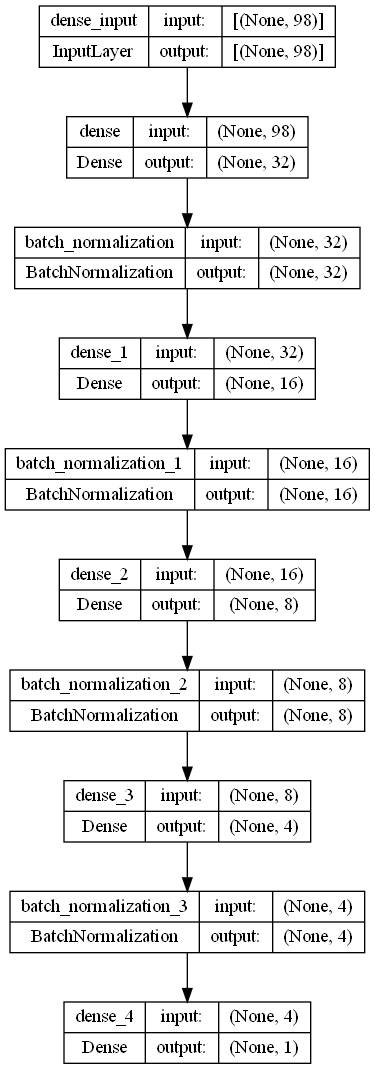

In [56]:
# Plot Layer
tf.keras.utils.plot_model(sequential_improvement, show_shapes=True)

## 7.2 - Model Training

In [57]:
# Train the model
history_sequential_improvement = sequential_improvement.fit(train_pipe, epochs=150, validation_data=val_pipe, batch_size=64, callbacks=EarlyStopping(monitor='val_loss', patience=72))

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Epoch 1/150
98/98 [==============================] - 2s 6ms/step - loss: 0.6198 - recall: 0.6439 - val_loss: 0.6961 - val_recall: 0.7263
Epoch 2/150
98/98 [==============================] - 0s 4ms/step - loss: 0.3762 - recall: 0.8219 - val_loss: 0.7153 - val_recall: 0.5621
Epoch 3/150
98/98 [==============================] - 0s 4ms/step - loss: 0.3153 - recall: 0.8416 - val_loss: 0.5263 - val_recall: 0.6148
Epoch 4/150
98/98 [==============================] - 0s 4ms/step - loss: 0.2962 - recall: 0.8495 - val_loss: 0.4361 - val_recall: 0.6506
Epoch 5/150
98/98 [==============================] - 0s 4ms/step - loss: 0.2860 - recall: 0.8511 - val_loss: 0.6267 - val_recall: 0.6332
Epoch 6/150
98/98 [==============================] - 0s 4ms/step - loss: 0.2813 - recall: 0.8521 - val_loss: 0.6492 - val_recall: 0.6573
Epoch 7/150
98/98 [==============================] - 0s 4ms/step - loss: 0.2779 - recall: 0.8533 - val_loss: 0.8721 - val_recall: 0.6292
Epoch 8/150
98/98 [======================

## 7.3 Model Evaluation

In [58]:
# Create dataframe
history_improvement_df = pd.DataFrame(history_sequential_improvement.history)

<Axes: >

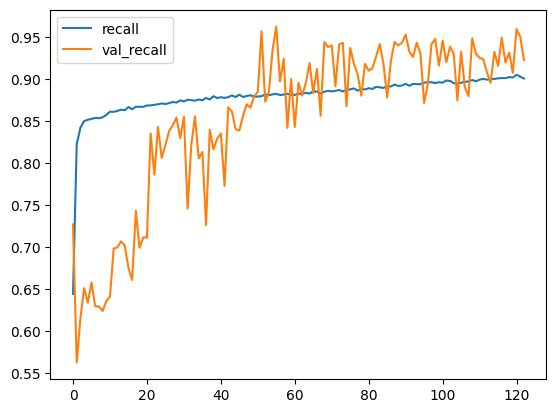

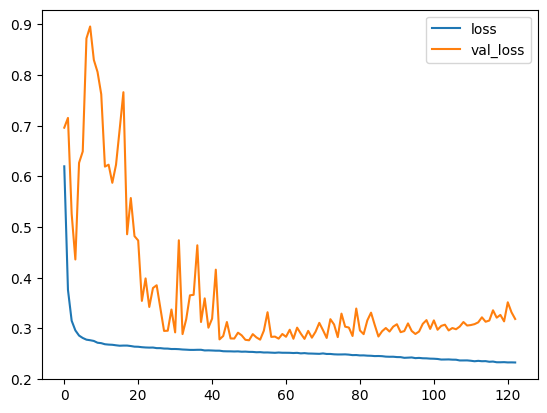

In [59]:
# plot_training_result
history_improvement_df[['recall', 'val_recall']].plot()
history_improvement_df[['loss', 'val_loss']].plot()

In [60]:
y_pred_func_tuned = sequential_improvement.predict(X_test)
y_pred_func_tuned = np.where(y_pred_func_tuned >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_func_tuned))

142/142 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      2126
           1       0.79      0.93      0.86      2412

    accuracy                           0.84      4538
   macro avg       0.85      0.83      0.83      4538
weighted avg       0.85      0.84      0.83      4538



# 8 - Functional Improvement

## 8.1 - Improvement Definition

In [61]:
# clear session
seed = 39
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [62]:
input_layer_improvement = Input(shape=(98,))
impr_hidden_layer_1 = Dense(32, activation='LeakyReLU',kernel_initializer="he_normal",)(input_layer_improvement)
impr_hidden_layer_1 = Dense(32, activation='LeakyReLU',kernel_initializer="he_normal",)(impr_hidden_layer_1)
impr_hidden_out_1 = layers.Dropout(0.3)(impr_hidden_layer_1)

impr_hidden_layer_2 = Dense(16, activation='LeakyReLU',kernel_initializer="he_normal",)(input_layer_improvement)
impr_hidden_layer_2 = Dense(16, activation='LeakyReLU',kernel_initializer="he_normal",)(impr_hidden_layer_2)
impr_hidden_out_2 = layers.Dropout(0.3)(impr_hidden_layer_1)

impr_hidden_layer_3 = Dense(8, activation='LeakyReLU',kernel_initializer="he_normal",)(input_layer_improvement)
impr_hidden_layer_3= Dense(8, activation='LeakyReLU',kernel_initializer="he_normal",)(impr_hidden_layer_3)
impr_hidden_out_3 = layers.Dropout(0.3)(impr_hidden_layer_1)

impr_hidden_layer_4 = Dense(4, activation='LeakyReLU',kernel_initializer="he_normal",)(input_layer_improvement)
impr_hidden_layer_4 = Dense(4, activation='LeakyReLU',kernel_initializer="he_normal",)(impr_hidden_layer_4)
impr_hidden_out_4 = layers.Dropout(0.3)(impr_hidden_layer_1)

concat_layer_impr = concatenate([impr_hidden_out_1, impr_hidden_out_2, impr_hidden_out_3, impr_hidden_out_4])

output_layer_impr = Dense(1, activation='sigmoid')(concat_layer_impr)

model_functional_impr = Model(inputs=input_layer_improvement, outputs=output_layer_impr)

In [63]:
#compile
model_functional_impr.compile(loss='binary_crossentropy',
                        optimizer='Adamax',
                        metrics=['Recall']    
                        ) 


model_functional_impr.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 98)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           3168        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           1056        ['dense[0][0]']                  
                                                                                                  
 dropout (Dropout)              (None, 32)           0           ['dense_1[0][0]']                
                                                                                              

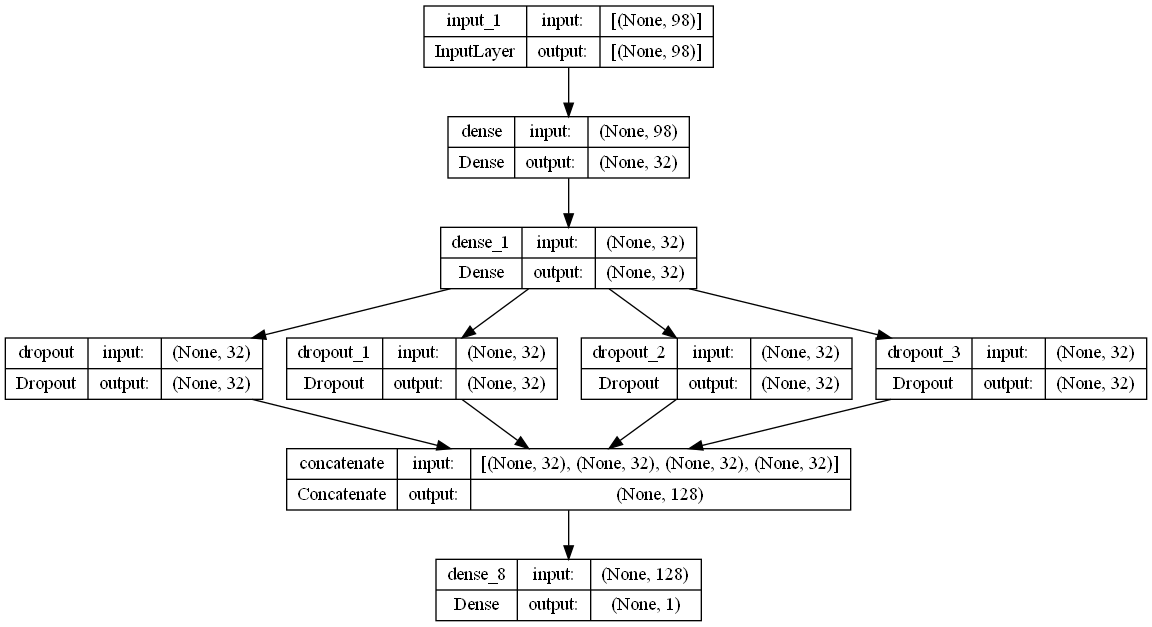

In [64]:
tf.keras.utils.plot_model(model_functional_impr,show_shapes=True)

## 8.2 Improvement Training

In [65]:
# Train model menggunakan early stopping
history_seq_improvement = model_functional_impr.fit(train_pipe, epochs=100, validation_data=val_pipe, batch_size=64, callbacks=EarlyStopping(monitor='val_loss', patience=20))

print("Process finished --- %s seconds ---" % (time.time() - start_time))

Epoch 1/100
98/98 [==============================] - 1s 6ms/step - loss: 5.1689 - recall: 0.5567 - val_loss: 0.6637 - val_recall: 0.7018
Epoch 2/100
98/98 [==============================] - 0s 3ms/step - loss: 1.6597 - recall: 0.5871 - val_loss: 0.6277 - val_recall: 0.8425
Epoch 3/100
98/98 [==============================] - 0s 3ms/step - loss: 0.8435 - recall: 0.6510 - val_loss: 0.6146 - val_recall: 0.5611
Epoch 4/100
98/98 [==============================] - 0s 3ms/step - loss: 0.6528 - recall: 0.7053 - val_loss: 0.5028 - val_recall: 0.8368
Epoch 5/100
98/98 [==============================] - 0s 3ms/step - loss: 0.5472 - recall: 0.7723 - val_loss: 0.4632 - val_recall: 0.7969
Epoch 6/100
98/98 [==============================] - 0s 3ms/step - loss: 0.4906 - recall: 0.8026 - val_loss: 0.4185 - val_recall: 0.7770
Epoch 7/100
98/98 [==============================] - 0s 3ms/step - loss: 0.4372 - recall: 0.8231 - val_loss: 0.3784 - val_recall: 0.7749
Epoch 8/100
98/98 [======================

## 8.3 - Improvement Evaluation

In [66]:
# Create dataframe
history_improvement_df = pd.DataFrame(history_seq_improvement.history)

<Axes: >

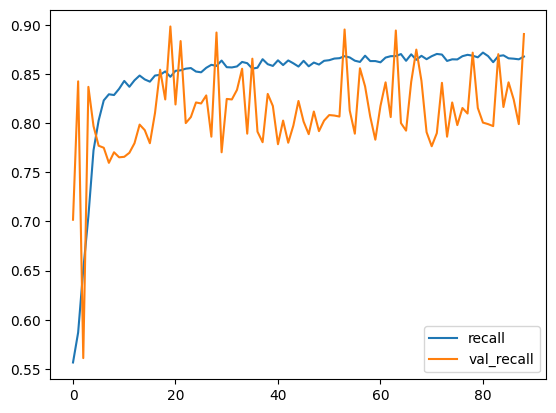

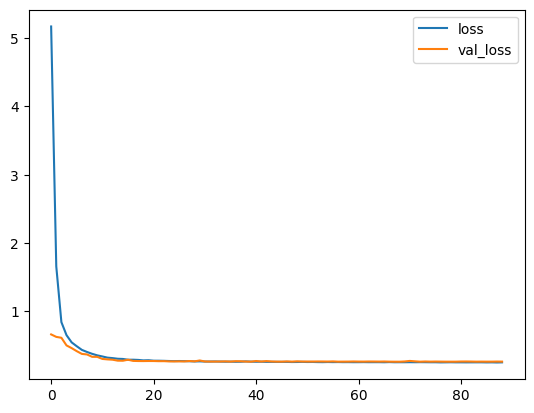

In [67]:
# plot_training_result
history_improvement_df[['recall', 'val_recall']].plot()
history_improvement_df[['loss', 'val_loss']].plot()

In [68]:
# Model Evaluation of test-set

y_pred_seq = model_functional_impr.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

print(classification_report(y_test, y_pred_seq))

142/142 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2126
           1       0.84      0.88      0.86      2412

    accuracy                           0.85      4538
   macro avg       0.85      0.84      0.84      4538
weighted avg       0.85      0.85      0.84      4538



# 9 - Model Saving

In [69]:
# Save Pipeline
with open('pipeline.pkl', 'wb') as file_1:
    pickle.dump(pipeline, file_1)

- For the sequential model, we have succeeded to decrease the loss with average `0.26` from `0.20`, but the model before the improvement have better performance and the model after improvement tend to overfit

- For the Functional API Model, the we succeeded to lower the val_loss and get better recall score after the improvement 

- Hence, we will use `functional model after the improvement`

In [70]:
# Summary of model sequential
model_functional_impr.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 98)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           3168        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           1056        ['dense[0][0]']                  
                                                                                                  
 dropout (Dropout)              (None, 32)           0           ['dense_1[0][0]']                
                                                                                              

In [71]:
# Freeze Model
model_functional_impr.trainable = False
model_functional_impr.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 98)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 32)           3168        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           1056        ['dense[0][0]']                  
                                                                                                  
 dropout (Dropout)              (None, 32)           0           ['dense_1[0][0]']                
                                                                                              

In [72]:
# Save Model ANN Model
model_functional_impr.save('churn_model.h5')

# 10 - Inference

In [116]:
# Randomly sample 10 data points from X_test
data_inf = X_test.sample(n=10, replace=False)
data_inf = data_inf.reset_index().drop('index', axis=1)

In [117]:
# Transform Inference-Set
data_inf_transform = model_pipeline.transform(data_inf)

In [118]:
y_pred_inf = model_churn.predict(data_inf_transform)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

1/1 [==============================] - 0s 28ms/step


array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0]])

In [119]:
df = pd.DataFrame(y_pred_inf, columns=['churn_prediction'])
df

,churn_prediction
0,1
1,0
2,0
3,1
4,1
5,1
6,0
7,1
8,1
9,0


In [121]:
def predicted_data(data_inf, new_data):
    # Convert new_data to a pandas DataFrame with a single column
    df = pd.DataFrame(new_data, columns=['churn_prediction'])

    # Concatenate the new_df with df_sample and sample 10 rows without replacement
    combined_df = pd.concat([data_inf, df], axis=1)

    return combined_df

In [122]:
predicted_df = predicted_data(data_inf, y_pred_inf)
predicted_df

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,year,month,day,last_visit_time_hh,last_visit_time_mm,churn_prediction
0,10,F,City,Basic Membership,No,Without Offers,Both,Wi-Fi,11,436.80,9.0,Yes,No,Yes,Solved,No reason specified,2016,2,3,00,49,1
1,47,F,Town,Platinum Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,14,165.42,16.0,Yes,No,No,Not Applicable,Too many ads,2015,2,19,19,34,0
2,23,F,Town,Silver Membership,No,Credit/Debit Card Offers,Desktop,Mobile_Data,3,280.05,18.0,Yes,Yes,Yes,Solved,Poor Product Quality,2016,6,13,19,23,0
3,64,F,Town,Silver Membership,Yes,Without Offers,Desktop,Fiber_Optic,3,1147.91,12.0,Yes,Yes,No,Not Applicable,Poor Website,2016,12,24,14,15,1
4,37,M,City,Gold Membership,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,4,120.19,27.0,No,Yes,Yes,No Information Available,No reason specified,2016,2,8,19,47,1
5,26,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Both,Fiber_Optic,10,597.91,18.0,Yes,Yes,No,Not Applicable,Poor Website,2017,10,5,21,44,1
6,54,M,Town,Silver Membership,Yes,Credit/Debit Card Offers,Smartphone,Fiber_Optic,9,300.81,0.0,Yes,Yes,Yes,Solved,Poor Customer Service,2015,12,9,13,52,0
7,52,M,Town,Silver Membership,No,Credit/Debit Card Offers,Smartphone,Fiber_Optic,22,178.30,0.0,Yes,No,Yes,Solved in Follow-up,Too many ads,2017,4,30,01,57,1
8,49,F,City,Basic Membership,No,Without Offers,Smartphone,Mobile_Data,18,414.00,24.0,Yes,No,Yes,Solved in Follow-up,Poor Website,2016,9,15,16,08,1
9,62,M,Town,Premium Membership,Yes,Without Offers,Desktop,Wi-Fi,10,32.16,3.0,No,Yes,No,Not Applicable,Reasonable Price,2017,10,16,11,29,0


# 11 - Conclusion

## Data Analysis:

From the overall data, there is a tendency for customers to have a churn risk. Several indications or parameters that cause this tendency were identified, including:

* In terms of membership, customers who `do not have membership or only have basic membership` have a higher churn risk. On the other hand, customers who `have upper-class memberships such as premium and platinum memberships` have no churn risk at all.

* Furthermore, when looking at the total transaction value, if the average value is `above 50,000 USD`, the `churn risk is almost non-existent`. Alongside the transaction value, the more points a customer has in their wallet, the smaller the risk of churn.

* Regarding their login activity, the more frequently customers log in, the higher the risk of churn. Frequent logins can be caused by poor website performance, which may cause customers to experience difficulties and require more time to fulfill their inquiries.

## Modeling:

* The performance measure chosen for the modeling is `recall Score` because the company wants to miss-assess the churned customer. Hence if the churned customer already detected, the company could do neccessary actions to prevent it.

For the modeling, two ANN models with different architectures, Sequential and Functional, were built and evaluated. Regarding performance consistency, both models were consistent since they were tested on validation and test data, even overfitting was observed `only` in sequential after improvement. 

The functional model after improvement have better recall score and val_loss, which one we will save. 



## Business: 

Based on the analysis above, the business can implement several strategies to improve customer retention and decrease churn:

* Offer incentives for customers to upgrade their membership to upper-class memberships such as premium and platinum memberships. These customers have no churn risk at all, so the business should focus on retaining these customers.

* Encourage customers to increase their total transaction value by offering discounts or special promotions for customers who spend above 50,000 USD. This will help to reduce churn risk significantly.

* Develop a loyalty program that rewards customers for their loyalty, such as giving them points that can be redeemed for special benefits. This will increase the points in their wallet and reduce churn risk.

* Address website performance issues to improve the customer experience and reduce the frequency of logins, which are associated with higher churn risk. This can be achieved by implementing regular maintenance and upgrades to the website.

In addition, the business can `implement RFM (Recency, Frequency, Monetary)` analysis for better segmentation and more personalized marketing. RFM analysis is a method used to segment customers based on their transaction history, specifically how recently they have made a purchase, how often they make purchases, and how much they spend. This can help the business to identify high-value customers and tailor their marketing efforts to specific customer segments, improving customer retention and reducing churn. By utilizing RFM analysis, the business can offer personalized incentives and promotions to customers based on their purchasing behavior, increasing customer loyalty and decreasing churn.
